## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

## Exploratory data analysis

In [7]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
#observe the different feature type present in the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Here we will observe the distribution of our classes

In [9]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

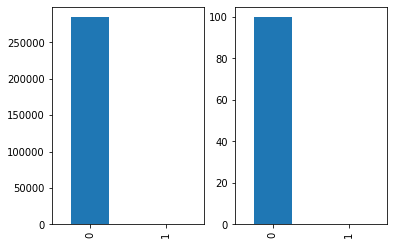

In [14]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.subplot(1,2,1)
df['Class'].value_counts().plot(kind='bar')
plt.subplot(1,2,2)
(df['Class'].value_counts()*100/len(df['Class'])).plot(kind='bar')

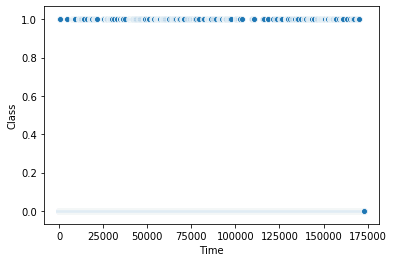

In [16]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(df['Time'],df['Class'])

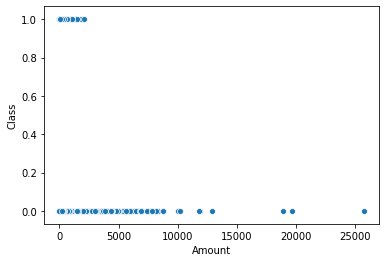

In [17]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(df['Amount'],df['Class'])

In [18]:
# Drop unnecessary columns
df.drop(columns=['Time'],inplace=True)

### Splitting the data into train & test data

In [38]:
y=df['Class'] #class variable
X=df.drop(columns=['Class'])

In [212]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100,stratify=y )

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [40]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
350
142


### Plotting the distribution of a variable

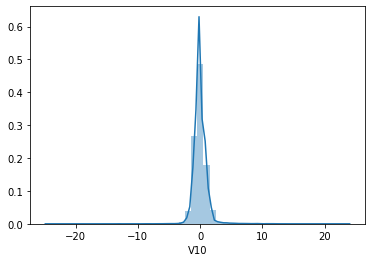

In [45]:
# plot the histogram of a variable from the dataset to see the skewness
sns.distplot(df['V10'])

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [46]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(copy=False)
pt.fit(X_train)

PowerTransformer(copy=False, method='yeo-johnson', standardize=True)

In [47]:
X_train=pd.DataFrame(pt.transform(X_train),columns=X_train.columns)

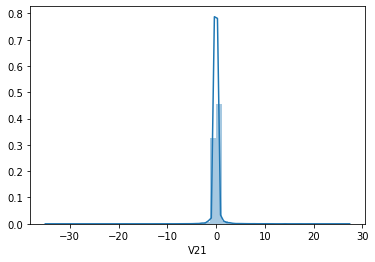

In [50]:
# plot the histogram of a variable from the dataset again to see the result 
sns.distplot(df['V21'])

## Model Building
- Build different models on the imbalanced dataset and see the result

In [82]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression #import the package

num_C = 0.1  #--> list of values
cv_num = 3  #--> list of values
logst=LogisticRegression(penalty='l2')
params = {'C': [0.001, 0.002, 0.005,0.007,0.01]}

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [83]:
from sklearn.model_selection import GridSearchCV
#perform cross validation
#perform hyperparameter tuning
modelcv=GridSearchCV(estimator=logst,param_grid=params,scoring='roc_auc',return_train_score=True,cv=3,verbose=True)
modelcv.fit(X_train,y_train)



#print the optimum value of hyperparameters
print(modelcv.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   10.5s finished


{'C': 0.001}


In [84]:
#print the evaluation result by choosing a evaluation metric
pd.DataFrame(modelcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.529030,0.028105,0.026319,0.000470,0.001,{'C': 0.001},0.979222,0.966362,0.983490,0.976358,0.007280,1,0.990077,0.994213,0.989793,0.991361,0.002020
1,0.537358,0.027385,0.024655,0.001249,0.002,{'C': 0.002},0.978152,0.965505,0.981833,0.975163,0.006993,2,0.990233,0.994256,0.990164,0.991551,0.001913
2,0.628639,0.055844,0.025989,0.000814,0.005,{'C': 0.005},0.977499,0.965269,0.980360,0.974376,0.006545,3,0.990355,0.994367,0.990598,0.991773,0.001837
3,0.702930,0.081768,0.026321,0.001697,0.007,{'C': 0.007},0.977466,0.965375,0.979967,0.974269,0.006372,4,0.990384,0.994417,0.990719,0.991840,0.001828
4,0.697933,0.062863,0.024323,0.003298,0.01,{'C': 0.01},0.977553,0.965539,0.979621,0.974238,0.006208,5,0.990404,0.994464,0.990820,0.991896,0.001824


In [77]:
# drawing the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

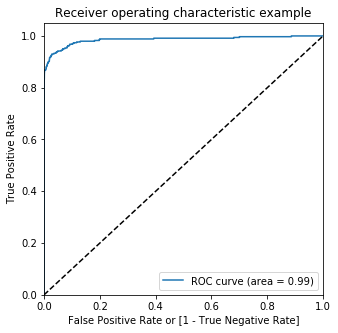

In [252]:
#print the evaluation result by choosing a evaluation metric
logst=LogisticRegression(penalty='l2',C=0.001)
logst.fit(X_train,y_train)
draw_roc(y_train,pd.DataFrame(logst.predict_proba(X_train))[1])

In [253]:
from sklearn.metrics import confusion_matrix, classification_report
pred=logst.predict(X_train)
print(confusion_matrix(y_train, pred))
print(classification_report(y_train, pred))

[[198996     24]
 [   158    186]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.89      0.54      0.67       344

    accuracy                           1.00    199364
   macro avg       0.94      0.77      0.84    199364
weighted avg       1.00      1.00      1.00    199364



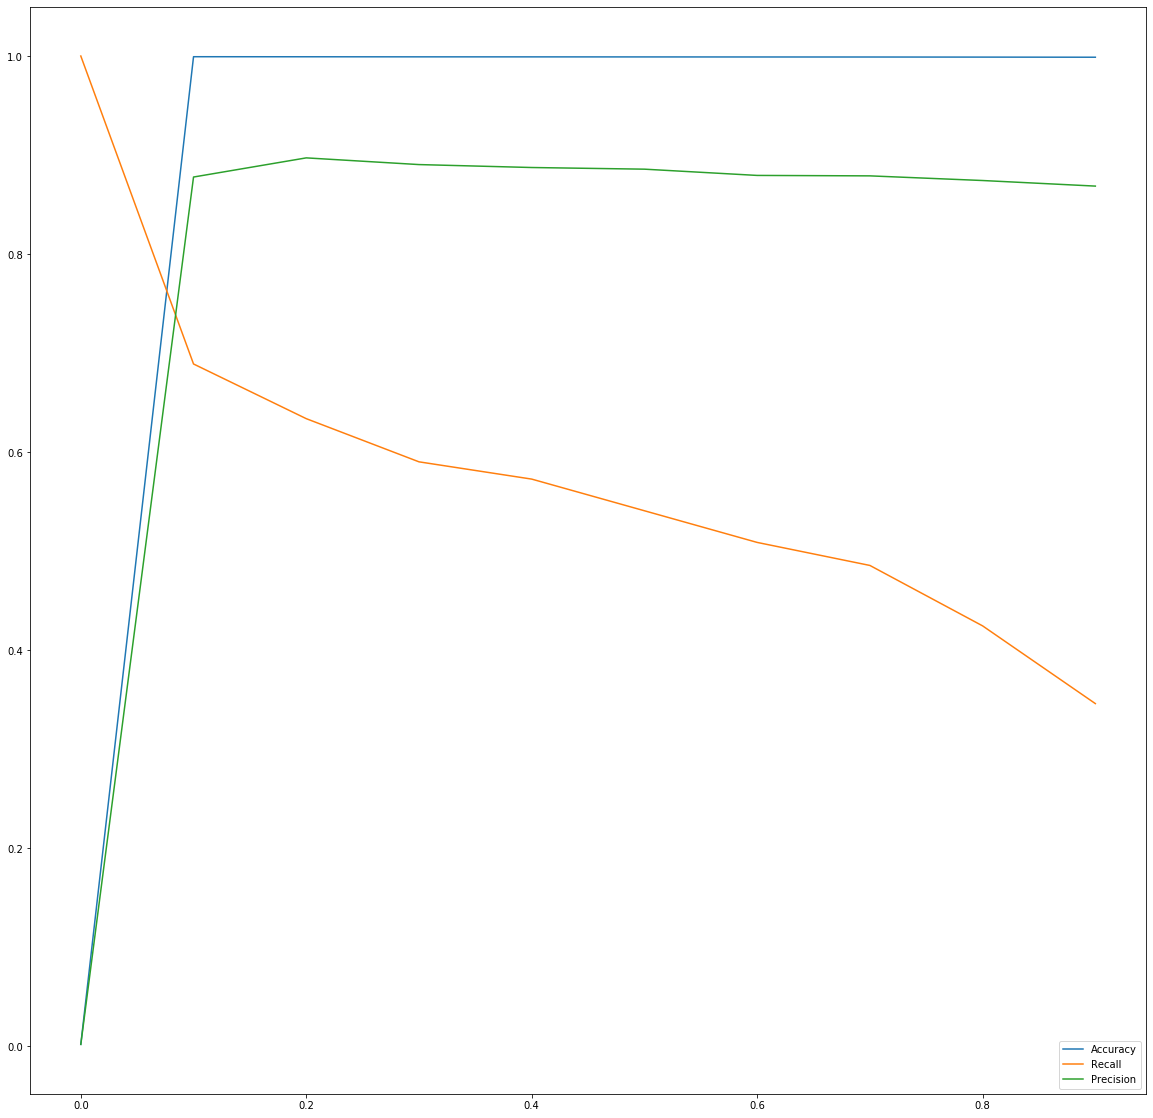

In [254]:
#finding probablities of churn
y_train_pred_prob=pd.DataFrame(logst.predict_proba(X_train))[1]
y_test_pred_prob=pd.DataFrame(logst.predict_proba(X_test))[1]

# finding the cutoff probablites
y_train_pred=pd.DataFrame()
prob=[i/10 for i in range(0,10)]
for i in prob:
    y_train_pred[i]=y_train_pred_prob.map(lambda x: 1 if x>i else 0)
#y_train_pred.head()

# finding accuracy,precision,recall for different cutoffs
df_metrics=pd.DataFrame(columns=['Accuracy','Recall','Precision'])
for i in list(y_train_pred.columns):
    df_metrics.loc[i,'Accuracy']= metrics.accuracy_score(y_train,y_train_pred[i])
    df_metrics.loc[i,'Recall']=metrics.recall_score(y_train,y_train_pred[i])
    df_metrics.loc[i,'Precision']=metrics.precision_score(y_train,y_train_pred[i])
#df_metrics

# plotting different cutoff and their probablities
df_metrics.plot.line(y=['Accuracy','Recall','Precision'])

In [255]:
#Precision and Recall on train data
from sklearn.metrics import confusion_matrix, classification_report
pred=y_train_pred_prob.map(lambda x: 1 if x>0.1 else 0)
print(confusion_matrix(y_train, pred))
print(classification_report(y_train, pred))

[[198987     33]
 [   107    237]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.88      0.69      0.77       344

    accuracy                           1.00    199364
   macro avg       0.94      0.84      0.89    199364
weighted avg       1.00      1.00      1.00    199364



In [256]:
#Precision and Recall on test data
pred=y_test_pred_prob.map(lambda x: 1 if x>0.1 else 0)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[85274    21]
 [   50    98]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.82      0.66      0.73       148

    accuracy                           1.00     85443
   macro avg       0.91      0.83      0.87     85443
weighted avg       1.00      1.00      1.00     85443



### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

### Random Forest

In [101]:
#importing the libraries
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,scoring='roc_auc', return_train_score=True,
                          cv = 3, n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 167.9min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 204.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [103]:
# grid search best parameters
grid_search.best_params_

{'max_depth': 10,
 'max_features': 5,
 'min_samples_leaf': 100,
 'min_samples_split': 200,
 'n_estimators': 100}

In [104]:
# gridsearch results
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,55.993922,0.266696,0.873834,0.029312,4,5,100,200,100,"{'max_depth': 4, 'max_features': 5, 'min_sampl...",0.466667,0.673469,0.528796,0.556311,0.086640,26
1,101.610449,3.548613,1.429182,0.011511,4,5,100,200,200,"{'max_depth': 4, 'max_features': 5, 'min_sampl...",0.572207,0.649180,0.394584,0.538657,0.106611,29
2,150.544073,1.432284,2.136811,0.036480,4,5,100,200,300,"{'max_depth': 4, 'max_features': 5, 'min_sampl...",0.541237,0.647059,0.515152,0.567816,0.057036,25
3,51.116759,0.776549,0.742539,0.003183,4,5,100,400,100,"{'max_depth': 4, 'max_features': 5, 'min_sampl...",0.538462,0.586103,0.511166,0.545244,0.030966,27
4,103.200077,0.234234,1.450503,0.038286,4,5,100,400,200,"{'max_depth': 4, 'max_features': 5, 'min_sampl...",0.525000,0.624606,0.440605,0.530070,0.075204,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,332.491999,12.290853,1.912572,0.047485,10,10,300,200,200,"{'max_depth': 10, 'max_features': 10, 'min_sam...",0.461538,0.327332,0.384906,0.391259,0.054973,61
68,502.727387,20.701067,2.842424,0.039650,10,10,300,200,300,"{'max_depth': 10, 'max_features': 10, 'min_sam...",0.451613,0.377863,0.388571,0.406016,0.032537,57
69,168.778842,8.312019,0.971811,0.024563,10,10,300,400,100,"{'max_depth': 10, 'max_features': 10, 'min_sam...",0.429752,0.388998,0.413655,0.410802,0.016760,55
70,340.004042,13.846877,1.895601,0.034366,10,10,300,400,200,"{'max_depth': 10, 'max_features': 10, 'min_sam...",0.495283,0.341880,0.456763,0.431309,0.065161,45


In [152]:
# Building model using best parameters got from grid search
rf = RandomForestClassifier(max_depth= 8,
 max_features= 10,
 min_samples_leaf= 100,
 min_samples_split= 200,
 n_estimators= 100)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [117]:
# predicting the outcome of model on train and test dataset
y_train_pred=rf.predict(X_train)
y_test_pred=rf.predict(X_test)

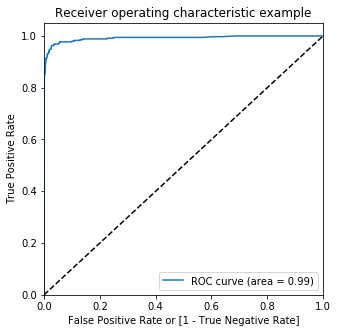

In [174]:
#print the evaluation result by choosing a evaluation metric
draw_roc(y_train,pd.DataFrame(rf.predict_proba(X_train))[1])

In [108]:
# observing precision and recall score for churn customers (training)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199014
           1       0.62      0.95      0.75       350

    accuracy                           1.00    199364
   macro avg       0.81      0.98      0.87    199364
weighted avg       1.00      1.00      1.00    199364



In [119]:
#Precision and Recall on test data
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[85089   212]
 [   24   118]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.36      0.83      0.50       142

    accuracy                           1.00     85443
   macro avg       0.68      0.91      0.75     85443
weighted avg       1.00      1.00      1.00     85443



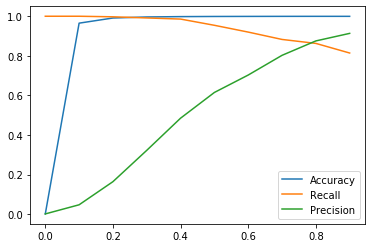

In [110]:
#finding probablities of churn
y_train_pred_prob=pd.DataFrame(rf.predict_proba(X_train))[1]
y_test_pred_prob=pd.DataFrame(rf.predict_proba(X_test))[1]

# finding the cutoff probablites
y_train_pred=pd.DataFrame()
prob=[i/10 for i in range(0,10)]
for i in prob:
    y_train_pred[i]=y_train_pred_prob.map(lambda x: 1 if x>i else 0)
#y_train_pred.head()

# finding accuracy,precision,recall for different cutoffs
df_metrics=pd.DataFrame(columns=['Accuracy','Recall','Precision'])
for i in list(y_train_pred.columns):
    df_metrics.loc[i,'Accuracy']= metrics.accuracy_score(y_train,y_train_pred[i])
    df_metrics.loc[i,'Recall']=metrics.recall_score(y_train,y_train_pred[i])
    df_metrics.loc[i,'Precision']=metrics.precision_score(y_train,y_train_pred[i])
#df_metrics

# plotting different cutoff and their probablities
df_metrics.plot.line(y=['Accuracy','Recall','Precision'])



In [114]:
#Precision and Recall on train data
from sklearn.metrics import confusion_matrix, classification_report
pred=y_train_pred_prob.map(lambda x: 1 if x>0.8 else 0)
print(confusion_matrix(y_train, pred))
print(classification_report(y_train, pred))

[[198971     43]
 [    48    302]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199014
           1       0.88      0.86      0.87       350

    accuracy                           1.00    199364
   macro avg       0.94      0.93      0.93    199364
weighted avg       1.00      1.00      1.00    199364



In [116]:
#Precision and Recall on test data
pred=y_test_pred_prob.map(lambda x: 1 if x>0.8 else 0)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[85265    36]
 [   37   105]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.74      0.74      0.74       142

    accuracy                           1.00     85443
   macro avg       0.87      0.87      0.87     85443
weighted avg       1.00      1.00      1.00     85443



### XGBOOST

In [127]:
# importing libraries
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance


In [129]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)


[[85263    38]
 [   26   116]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.75      0.82      0.78       142

    accuracy                           1.00     85443
   macro avg       0.88      0.91      0.89     85443
weighted avg       1.00      1.00      1.00     85443



In [130]:
from sklearn.metrics import confusion_matrix, classification_report
pred=xgb_model.predict(X_train)
print(confusion_matrix(y_train, pred))
print(classification_report(y_train, pred))

[[199005      9]
 [    53    297]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199014
           1       0.97      0.85      0.91       350

    accuracy                           1.00    199364
   macro avg       0.99      0.92      0.95    199364
weighted avg       1.00      1.00      1.00    199364



In [131]:
from sklearn.metrics import confusion_matrix, classification_report
pred=xgb_model.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[85263    38]
 [   26   116]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.75      0.82      0.78       142

    accuracy                           1.00     85443
   macro avg       0.88      0.91      0.89     85443
weighted avg       1.00      1.00      1.00     85443



In [133]:
# hyperparameter tuning with XGBoost
from sklearn.model_selection import RandomizedSearchCV
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = RandomizedSearchCV(estimator = xgb_model, 
                        param_distributions = param_grid, 
                        scoring='roc_auc',
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

model_cv.fit(X_train,y_train)

C:\Users\mahes\Miniconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  9.8min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=2, min_child_weight=1,
                                           missing=None, n_estimators=200,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='de

In [142]:
# grid search best parameters
model_cv.best_params_

{'subsample': 0.6, 'learning_rate': 0.2}

In [145]:
pd.DataFrame(model_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,25.824959,0.332728,0.336238,0.005249,0.3,0.2,"{'subsample': 0.3, 'learning_rate': 0.2}",0.971153,0.958423,0.978262,0.969279,0.008207,5,0.999767,0.999967,0.999798,0.999844,0.000088
1,34.000549,0.185989,0.328471,0.000937,0.6,0.2,"{'subsample': 0.6, 'learning_rate': 0.2}",0.986520,0.962944,0.979508,0.976324,0.009884,1,0.999967,0.999993,0.999912,0.999957,0.000034
2,36.888433,0.111685,0.325461,0.001695,0.9,0.2,"{'subsample': 0.9, 'learning_rate': 0.2}",0.981058,0.964820,0.979530,0.975136,0.007321,2,0.999960,0.999995,0.999945,0.999966,0.000021
3,25.095421,0.247611,0.345122,0.002368,0.3,0.6,"{'subsample': 0.3, 'learning_rate': 0.6}",0.973290,0.947848,0.978413,0.966517,0.013365,6,0.999989,1.000000,0.999998,0.999996,0.000005
4,32.534858,0.489669,0.349124,0.002620,0.6,0.6,"{'subsample': 0.6, 'learning_rate': 0.6}",0.969124,0.967006,0.973862,0.969997,0.002866,4,1.000000,1.000000,1.000000,1.000000,0.000000
5,35.061570,0.239595,0.349445,0.003664,0.9,0.6,"{'subsample': 0.9, 'learning_rate': 0.6}",0.970385,0.964742,0.979517,0.971548,0.006088,3,1.000000,1.000000,1.000000,1.000000,0.000000


In [140]:
xgb_model = XGBClassifier(max_depth=2, n_estimators=200,subsample= 0.6, learning_rate= 0.2)
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

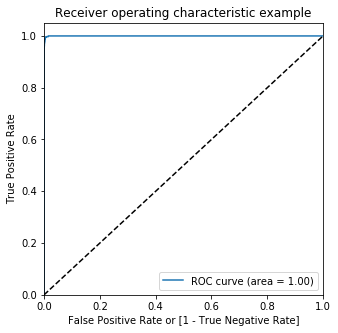

In [141]:
#print the evaluation result by choosing a evaluation metric
draw_roc(y_train,pd.DataFrame(xgb_model.predict_proba(X_train))[1])

In [146]:
from sklearn.metrics import confusion_matrix, classification_report
pred=xgb_model.predict(X_train)
print(confusion_matrix(y_train, pred))
print(classification_report(y_train, pred))

[[199010      4]
 [    38    312]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199014
           1       0.99      0.89      0.94       350

    accuracy                           1.00    199364
   macro avg       0.99      0.95      0.97    199364
weighted avg       1.00      1.00      1.00    199364



In [147]:
from sklearn.metrics import confusion_matrix, classification_report
pred=xgb_model.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[85236    65]
 [   26   116]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.64      0.82      0.72       142

    accuracy                           1.00     85443
   macro avg       0.82      0.91      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [175]:
clf = RandomForestClassifier(max_depth= 8,
 max_features= 10,
 min_samples_leaf= 100,
 min_samples_split= 200,
 n_estimators= 100) #initialise the model with optimum hyperparameters
clf.fit(X_train, y_train)
 #print the evaluation score on the X_test by choosing the best evaluation metric
print("roc_auc_score :",metrics.roc_auc_score(y_test,clf.predict_proba(X_test)[:,1]) ) 

roc_auc_score : 0.9413163427405619


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 12


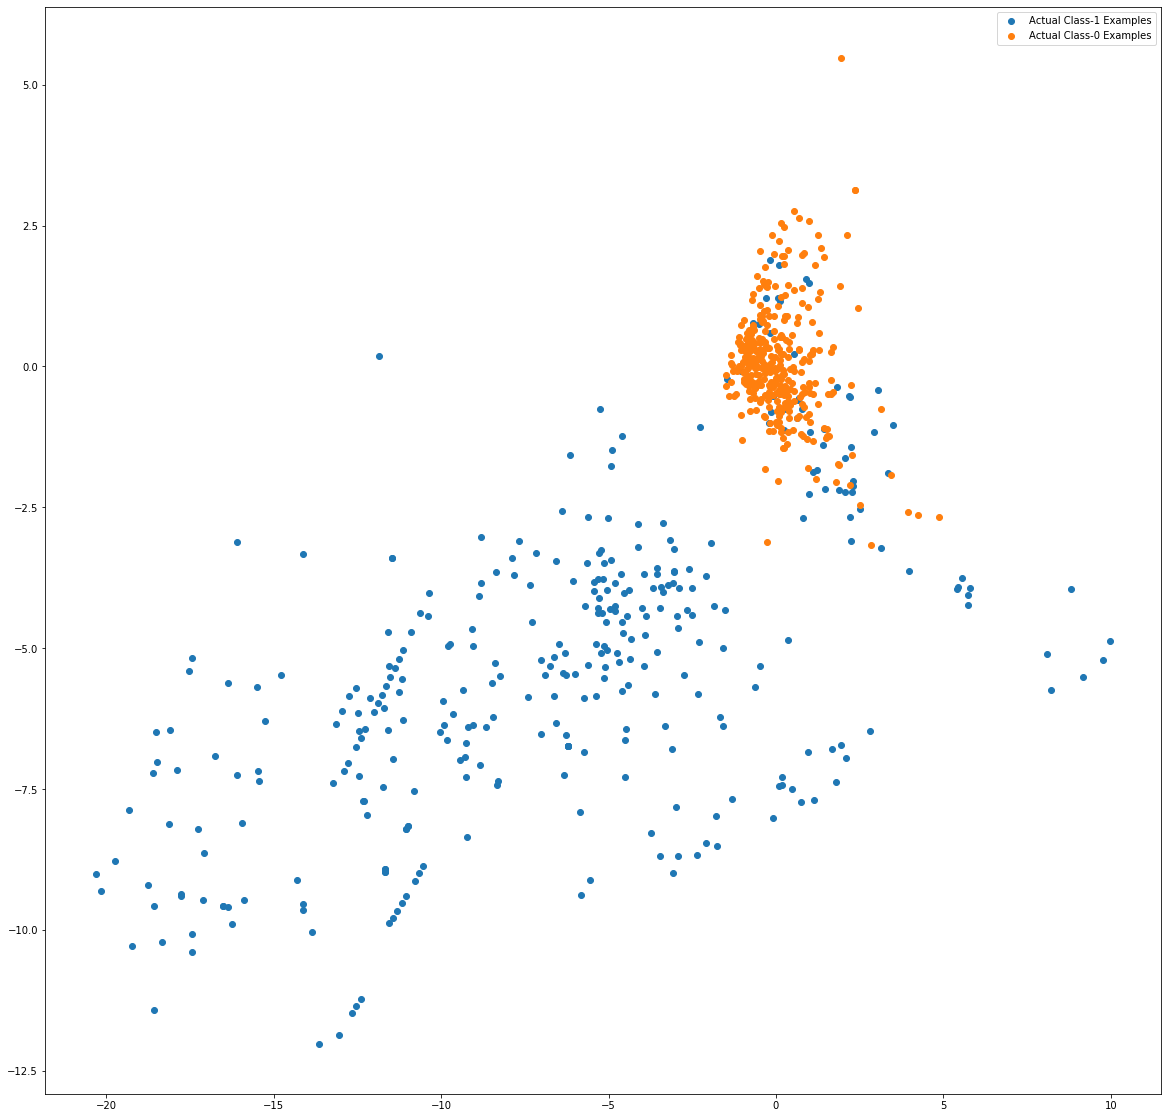

In [176]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

In [ ]:
# Logistic Regression
from sklearn import linear_model #import the package

#num_C = ______  #--> list of values
#cv_num =   #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling

In [545]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=0,sampling_strategy=0.02)
X_train_sample,y_train_sample=ros.fit_resample(X_train,y_train)
X_train_sample

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,2.053474,-0.149880,-1.092234,0.420978,-0.225796,-1.159629,0.082871,-0.236532,0.733270,0.102520,...,-0.313465,-0.298362,-0.779702,0.362701,-0.048183,-0.356438,0.205392,-0.075806,-0.063325,1.29
1,0.149477,1.112008,-0.391539,-0.557452,1.014727,-0.801985,1.042734,-0.167625,-0.200830,-0.863839,...,0.084311,-0.331768,-0.755443,0.079155,0.587098,-0.383245,0.110292,0.229167,0.086294,2.69
2,2.145379,0.215237,-2.221643,-0.067032,0.815822,-1.358596,0.843943,-0.594243,0.009745,-0.021497,...,-0.133286,0.153606,0.611995,-0.027494,0.824538,0.505014,0.203037,-0.083225,-0.069468,4.55
3,-0.354219,0.100332,1.721509,-0.884417,-0.371977,-0.062313,-0.144740,0.163123,-1.843755,0.520706,...,0.295444,0.136969,0.217167,-0.014350,0.016538,-0.326120,-0.285113,0.118226,0.103791,19.95
4,-0.439888,1.871311,-1.106687,1.064853,1.239594,-0.633668,1.100319,0.221096,-0.917002,-0.844362,...,0.024939,0.059066,0.366613,-0.250861,0.494710,0.091257,-0.398552,0.330173,0.219909,6.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202995,0.702710,2.426433,-5.234513,4.416661,-2.170806,-2.667554,-3.878088,0.911337,-0.166199,-5.009249,...,0.422743,0.551180,-0.009802,0.721698,0.473246,-1.959304,0.319476,0.600485,0.129305,1.00
202996,-8.744415,-3.420468,-4.850575,6.606846,-2.800546,0.105512,-3.269801,0.940378,-2.558691,-3.624775,...,-1.818315,0.102913,0.311626,-4.129195,0.034639,-1.133631,0.272265,1.841307,-1.796363,720.38
202997,-2.450367,2.107729,-5.140663,1.411304,-1.690780,-0.736427,-3.657946,1.944906,-0.788388,-5.624677,...,-0.130438,0.800538,0.364617,0.233608,-0.282078,-0.320311,0.492920,0.359976,-0.115471,80.22
202998,1.232604,-0.548931,1.087873,0.894082,-1.433055,-0.356797,-0.717492,0.003167,-0.100397,0.543187,...,-0.576274,-0.448671,-0.517568,0.012833,0.699217,0.527258,-0.322607,0.080805,0.035427,19.59


In [546]:
y_train_sample.value_counts()

0    199020
1      3980
Name: Class, dtype: int64

In [200]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline, make_pipeline
#perform cross validation
#perform hyperparameter tuning
logst=LogisticRegression()
kf=StratifiedKFold(n_splits=3,random_state=100)

imba_pipeline = make_pipeline(RandomOverSampler(random_state=42), 
                              LogisticRegression())

params={'logisticregression__C':[0.001, 0.002, 0.005,0.007,0.01]}
modelcv=GridSearchCV(estimator=imba_pipeline,param_grid=params,scoring='roc_auc',return_train_score=True,cv=kf,verbose=True)
modelcv.fit(X_train,y_train)



#print the optimum value of hyperparameters
print(modelcv.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   20.5s finished


{'C': 0.002}


In [201]:
pd.DataFrame(modelcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.028106,0.165624,0.072290,0.005551,0.001,{'C': 0.001},0.950151,0.949983,0.952212,0.950782,0.001013,5,0.951338,0.951171,0.949931,0.950813,0.000628
1,1.123357,0.066541,0.061965,0.000817,0.002,{'C': 0.002},0.951114,0.951079,0.952975,0.951723,0.000886,1,0.952227,0.952097,0.950957,0.951760,0.000571
2,1.188985,0.023101,0.063630,0.001699,0.005,{'C': 0.005},0.950570,0.950549,0.952342,0.951154,0.000840,2,0.951649,0.951486,0.950331,0.951155,0.000586
3,1.251616,0.019057,0.074292,0.012545,0.007,{'C': 0.007},0.950459,0.950321,0.952121,0.950967,0.000818,3,0.951494,0.951321,0.950133,0.950983,0.000605
4,1.236959,0.030754,0.064299,0.001698,0.01,{'C': 0.01},0.950290,0.950240,0.951960,0.950830,0.000799,4,0.951336,0.951210,0.950052,0.950866,0.000578


In [547]:
logst=LogisticRegression(penalty='l2',C= 0.002)
logst.fit(X_train_sample,y_train_sample)


LogisticRegression(C=0.002, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [548]:
from sklearn.metrics import confusion_matrix, classification_report
pred=logst.predict(X_train)
print(confusion_matrix(y_train, pred))
print(classification_report(y_train, pred))

[[198941     79]
 [    65    279]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.78      0.81      0.79       344

    accuracy                           1.00    199364
   macro avg       0.89      0.91      0.90    199364
weighted avg       1.00      1.00      1.00    199364



In [549]:
from sklearn.metrics import confusion_matrix, classification_report
pred=logst.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[85251    44]
 [   29   119]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.73      0.80      0.77       148

    accuracy                           1.00     85443
   macro avg       0.86      0.90      0.88     85443
weighted avg       1.00      1.00      1.00     85443



### Random Forest

In [192]:
#importing the libraries
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
param_grid = {
    'randomforestclassifier__max_depth': [4,8,10],
    'randomforestclassifier__min_samples_leaf': range(100, 400, 200),
    'randomforestclassifier__min_samples_split': range(200, 500, 200),
    'randomforestclassifier__n_estimators': [100,200, 300], 
    'randomforestclassifier__max_features': [5, 10]
}
kf=StratifiedKFold(n_splits=3,random_state=100)

imba_pipeline = make_pipeline(RandomOverSampler(random_state=42), 
                               RandomForestClassifier())

# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = RandomizedSearchCV(estimator = imba_pipeline, param_distributions = param_grid,scoring='roc_auc', return_train_score=True,
                          cv = 3, n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 32.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [194]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,params,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,206.501759,1.090125,1.823621,0.070775,200,400,100,5,8,"{'n_estimators': 200, 'min_samples_split': 400...",...,0.959731,0.971784,0.970816,0.008683,2,0.993577,0.994307,0.992584,0.993489,0.000706
1,103.715377,5.039630,0.907647,0.037249,100,400,100,5,8,"{'n_estimators': 100, 'min_samples_split': 400...",...,0.957296,0.972753,0.969316,0.008756,7,0.993390,0.995336,0.993151,0.993959,0.000979
2,119.201069,2.635978,0.993937,0.024894,100,200,300,5,10,"{'n_estimators': 100, 'min_samples_split': 200...",...,0.961406,0.971653,0.968926,0.005384,8,0.994305,0.995386,0.993478,0.994390,0.000781
3,295.012903,1.127413,2.550405,0.146624,300,200,300,10,4,"{'n_estimators': 300, 'min_samples_split': 200...",...,0.957305,0.969153,0.969662,0.010304,4,0.985111,0.991460,0.986597,0.987723,0.002711
4,370.763774,6.422331,1.692720,0.082896,200,400,300,10,8,"{'n_estimators': 200, 'min_samples_split': 400...",...,0.959582,0.971611,0.969433,0.007318,6,0.994571,0.996310,0.994179,0.995020,0.000926
5,213.625755,6.130613,0.958797,0.105573,100,200,300,10,10,"{'n_estimators': 100, 'min_samples_split': 200...",...,0.954953,0.968475,0.967852,0.010287,9,0.995481,0.996562,0.994983,0.995675,0.000659
6,231.696633,4.761661,1.005635,0.063583,100,200,100,10,10,"{'n_estimators': 100, 'min_samples_split': 200...",...,0.954233,0.971463,0.965774,0.008161,10,0.997567,0.998343,0.997132,0.997681,0.000501
7,491.687480,12.327962,2.047559,0.108187,200,200,100,10,10,"{'n_estimators': 200, 'min_samples_split': 200...",...,0.963300,0.974659,0.972247,0.006546,1,0.997971,0.998365,0.997160,0.997832,0.000502
8,238.037904,13.430842,1.047603,0.093914,100,400,300,10,10,"{'n_estimators': 100, 'min_samples_split': 400...",...,0.963394,0.968307,0.970037,0.006251,3,0.995906,0.996466,0.995190,0.995854,0.000522
9,200.106338,13.427684,1.081245,0.186432,200,400,300,10,4,"{'n_estimators': 200, 'min_samples_split': 400...",...,0.965750,0.967088,0.969586,0.004512,5,0.982815,0.990794,0.987139,0.986916,0.003261


In [195]:
grid_search.best_params_

{'n_estimators': 200,
 'min_samples_split': 200,
 'min_samples_leaf': 100,
 'max_features': 10,
 'max_depth': 10}

In [196]:
rf = RandomForestClassifier(n_estimators= 200,
 min_samples_split= 200,
 min_samples_leaf= 100,
 max_features= 10,
 max_depth= 10)
rf.fit(X_train_sample,y_train_sample)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [551]:
from sklearn.metrics import confusion_matrix, classification_report
pred=rf.predict(X_train)
print(confusion_matrix(y_train, pred))
print(classification_report(y_train, pred))

[[198912    108]
 [    47    297]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.73      0.86      0.79       344

    accuracy                           1.00    199364
   macro avg       0.87      0.93      0.90    199364
weighted avg       1.00      1.00      1.00    199364



In [552]:
from sklearn.metrics import confusion_matrix, classification_report
pred=rf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[85237    58]
 [   22   126]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.68      0.85      0.76       148

    accuracy                           1.00     85443
   macro avg       0.84      0.93      0.88     85443
weighted avg       1.00      1.00      1.00     85443



### XGBOOST

In [217]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train_sample,y_train_sample)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [553]:
from sklearn.metrics import confusion_matrix, classification_report
pred=xgb_model.predict(X_train)
print(confusion_matrix(y_train, pred))
print(classification_report(y_train, pred))

[[198970     50]
 [    37    307]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.86      0.89      0.88       344

    accuracy                           1.00    199364
   macro avg       0.93      0.95      0.94    199364
weighted avg       1.00      1.00      1.00    199364



In [554]:
from sklearn.metrics import confusion_matrix, classification_report
pred=xgb_model.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[85259    36]
 [   24   124]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.78      0.84      0.81       148

    accuracy                           1.00     85443
   macro avg       0.89      0.92      0.90     85443
weighted avg       1.00      1.00      1.00     85443



## SMOTE

### Logistic Regression

In [504]:
#sampling
from imblearn.over_sampling import SMOTE, ADASYN
X_train_smote, y_train_smote = SMOTE(sampling_strategy=0.02,random_state=42).fit_resample(X_train, y_train)

In [511]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline, make_pipeline
#perform cross validation
#perform hyperparameter tuning
logst=LogisticRegression()
kf=StratifiedKFold(n_splits=3,random_state=100)

imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                              LogisticRegression())

params={'logisticregression__C':[0.001, 0.002, 0.005,0.007,0.01]}
modelcv=GridSearchCV(estimator=imba_pipeline,param_grid=params,scoring='roc_auc',return_train_score=True,cv=kf,verbose=True)
modelcv.fit(X_train,y_train)



#print the optimum value of hyperparameters
print(modelcv.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.2min finished


{'logisticregression__C': 0.001}


In [512]:
pd.DataFrame(modelcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,4.544729,0.268107,0.027986,0.000815,0.001,{'logisticregression__C': 0.001},0.957221,0.982810,0.970870,0.970300,0.010455,1,0.989134,0.988021,0.989312,0.988822,0.000571
1,5.123398,0.499357,0.035981,0.004897,0.002,{'logisticregression__C': 0.002},0.955890,0.981640,0.966277,0.967936,0.010578,2,0.989046,0.987428,0.989424,0.988633,0.000866
2,5.202020,0.316364,0.030318,0.003298,0.005,{'logisticregression__C': 0.005},0.953934,0.981085,0.964519,0.966513,0.011174,4,0.989042,0.988165,0.989637,0.988948,0.000605
3,4.590704,0.139626,0.031984,0.001632,0.007,{'logisticregression__C': 0.007},0.952995,0.982658,0.964170,0.966608,0.012232,3,0.989012,0.986323,0.988731,0.988022,0.001207
4,4.690312,0.075195,0.028319,0.001247,0.01,{'logisticregression__C': 0.01},0.953157,0.981505,0.961348,0.965337,0.011912,5,0.989038,0.987764,0.989626,0.988809,0.000777


In [506]:
logst=LogisticRegression(penalty='l2',C= 0.001)
logst.fit(X_train_smote,y_train_smote)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [507]:
from sklearn.metrics import confusion_matrix, classification_report
pred=logst.predict(X_train)
print(confusion_matrix(y_train, pred))
print(classification_report(y_train, pred))

[[198953     67]
 [    63    281]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.81      0.82      0.81       344

    accuracy                           1.00    199364
   macro avg       0.90      0.91      0.91    199364
weighted avg       1.00      1.00      1.00    199364



In [508]:
from sklearn.metrics import confusion_matrix, classification_report
pred=logst.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[85254    41]
 [   27   121]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.75      0.82      0.78       148

    accuracy                           1.00     85443
   macro avg       0.87      0.91      0.89     85443
weighted avg       1.00      1.00      1.00     85443



### Random Forest

In [513]:
#importing the libraries
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
param_grid = {
    'randomforestclassifier__max_depth': [4,8,10],
    'randomforestclassifier__min_samples_leaf': range(100, 400, 200),
    'randomforestclassifier__min_samples_split': range(200, 500, 200),
    'randomforestclassifier__n_estimators': [100,200, 300], 
    'randomforestclassifier__max_features': [5, 10]
}
kf=StratifiedKFold(n_splits=3,random_state=100)

imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                               RandomForestClassifier())

# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = RandomizedSearchCV(estimator = imba_pipeline, param_distributions = param_grid,scoring='roc_auc', return_train_score=True,
                          cv = 3, n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: 

In [ ]:
grid_search.best_params_

In [ ]:
pd.DataFrame(grid_search.cv_results_)

In [514]:
rf = RandomForestClassifier(n_estimators= 200,
 min_samples_split= 200,
 min_samples_leaf= 100,
 max_features= 10,
 max_depth= 10)
rf.fit(X_train_smote,y_train_smote)    

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [515]:
from sklearn.metrics import confusion_matrix, classification_report
pred=rf.predict(X_train)
print(confusion_matrix(y_train, pred))
print(classification_report(y_train, pred))

[[198929     91]
 [    54    290]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.76      0.84      0.80       344

    accuracy                           1.00    199364
   macro avg       0.88      0.92      0.90    199364
weighted avg       1.00      1.00      1.00    199364



In [516]:
from sklearn.metrics import confusion_matrix, classification_report
pred=rf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[85245    50]
 [   23   125]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.71      0.84      0.77       148

    accuracy                           1.00     85443
   macro avg       0.86      0.92      0.89     85443
weighted avg       1.00      1.00      1.00     85443



### XGBOOST

In [555]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train_smote,y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [556]:
from sklearn.metrics import confusion_matrix, classification_report
pred=xgb_model.predict(X_train)
print(confusion_matrix(y_train, pred))
print(classification_report(y_train, pred))

[[198955     65]
 [    47    297]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.82      0.86      0.84       344

    accuracy                           1.00    199364
   macro avg       0.91      0.93      0.92    199364
weighted avg       1.00      1.00      1.00    199364



In [557]:
from sklearn.metrics import confusion_matrix, classification_report
pred=xgb_model.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[85246    49]
 [   23   125]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.72      0.84      0.78       148

    accuracy                           1.00     85443
   macro avg       0.86      0.92      0.89     85443
weighted avg       1.00      1.00      1.00     85443



## ADASYN

In [518]:
#sampling
from imblearn.over_sampling import SMOTE, ADASYN
X_train_adasyn, y_train_adasyn = ADASYN(sampling_strategy=0.02,random_state=42).fit_resample(X_train, y_train)

### Logistic Regression

In [519]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline, make_pipeline
#perform cross validation
#perform hyperparameter tuning
logst=LogisticRegression()
kf=StratifiedKFold(n_splits=3,random_state=100)

imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                              LogisticRegression())

params={'logisticregression__C':[0.001, 0.002, 0.005,0.007,0.01]}
modelcv=GridSearchCV(estimator=imba_pipeline,param_grid=params,scoring='roc_auc',return_train_score=True,cv=kf,verbose=True)
modelcv.fit(X_train,y_train)



#print the optimum value of hyperparameters
print(modelcv.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.2min finished


{'logisticregression__C': 0.001}


In [520]:
pd.DataFrame(modelcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,4.432234,0.157142,0.028319,0.001699,0.001,{'logisticregression__C': 0.001},0.957221,0.982810,0.970870,0.970300,0.010455,1,0.989134,0.988021,0.989312,0.988822,0.000571
1,4.783925,0.194914,0.026654,0.000471,0.002,{'logisticregression__C': 0.002},0.955890,0.981640,0.966277,0.967936,0.010578,2,0.989046,0.987428,0.989424,0.988633,0.000866
2,4.335183,0.122296,0.026322,0.000942,0.005,{'logisticregression__C': 0.005},0.953934,0.981085,0.964519,0.966513,0.011174,4,0.989042,0.988165,0.989637,0.988948,0.000605
3,4.599365,0.080754,0.031983,0.000816,0.007,{'logisticregression__C': 0.007},0.952995,0.982658,0.964170,0.966608,0.012232,3,0.989012,0.986323,0.988731,0.988022,0.001207
4,5.327947,0.190580,0.034317,0.003297,0.01,{'logisticregression__C': 0.01},0.953157,0.981505,0.961348,0.965337,0.011912,5,0.989038,0.987764,0.989626,0.988809,0.000777


In [521]:
logst=LogisticRegression(penalty='l2',C= 0.001)
logst.fit(X_train_adasyn,y_train_adasyn)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [522]:
from sklearn.metrics import confusion_matrix, classification_report
pred=logst.predict(X_train)
print(confusion_matrix(y_train, pred))
print(classification_report(y_train, pred))

[[198906    114]
 [    59    285]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.71      0.83      0.77       344

    accuracy                           1.00    199364
   macro avg       0.86      0.91      0.88    199364
weighted avg       1.00      1.00      1.00    199364



In [523]:
from sklearn.metrics import confusion_matrix, classification_report
pred=logst.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[85233    62]
 [   27   121]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.66      0.82      0.73       148

    accuracy                           1.00     85443
   macro avg       0.83      0.91      0.87     85443
weighted avg       1.00      1.00      1.00     85443



### RandomForest

In [ ]:
#importing the libraries
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
param_grid = {
    'randomforestclassifier__max_depth': [4,8,10],
    'randomforestclassifier__min_samples_leaf': range(100, 400, 200),
    'randomforestclassifier__min_samples_split': range(200, 500, 200),
    'randomforestclassifier__n_estimators': [100,200, 300], 
    'randomforestclassifier__max_features': [5, 10]
}
kf=StratifiedKFold(n_splits=3,random_state=100)

imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                               RandomForestClassifier())

# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = RandomizedSearchCV(estimator = imba_pipeline, param_distributions = param_grid,scoring='roc_auc', return_train_score=True,
                          cv = kf, n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

In [ ]:
pd.DataFrame(grid_search.cv_results_)

In [524]:
rf = RandomForestClassifier(n_estimators= 200,
 min_samples_split= 200,
 min_samples_leaf= 100,
 max_features= 10,
 max_depth= 10)
rf.fit(X_train_adasyn,y_train_adasyn)    

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [525]:
from sklearn.metrics import confusion_matrix, classification_report
pred=rf.predict(X_train)
print(confusion_matrix(y_train, pred))
print(classification_report(y_train, pred))

[[198912    108]
 [    47    297]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.73      0.86      0.79       344

    accuracy                           1.00    199364
   macro avg       0.87      0.93      0.90    199364
weighted avg       1.00      1.00      1.00    199364



In [526]:
from sklearn.metrics import confusion_matrix, classification_report
pred=rf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[85237    58]
 [   22   126]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.68      0.85      0.76       148

    accuracy                           1.00     85443
   macro avg       0.84      0.93      0.88     85443
weighted avg       1.00      1.00      1.00     85443



### XGBOOST

In [559]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train_adasyn,y_train_adasyn)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [560]:
from sklearn.metrics import confusion_matrix, classification_report
pred=xgb_model.predict(X_train)
print(confusion_matrix(y_train, pred))
print(classification_report(y_train, pred))

[[195943   3077]
 [     8    336]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    199020
           1       0.10      0.98      0.18       344

    accuracy                           0.98    199364
   macro avg       0.55      0.98      0.59    199364
weighted avg       1.00      0.98      0.99    199364



In [561]:
from sklearn.metrics import confusion_matrix, classification_report
pred=xgb_model.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[83997  1298]
 [   18   130]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.09      0.88      0.16       148

    accuracy                           0.98     85443
   macro avg       0.55      0.93      0.58     85443
weighted avg       1.00      0.98      0.99     85443



### Print the class distribution after applying SMOTE 

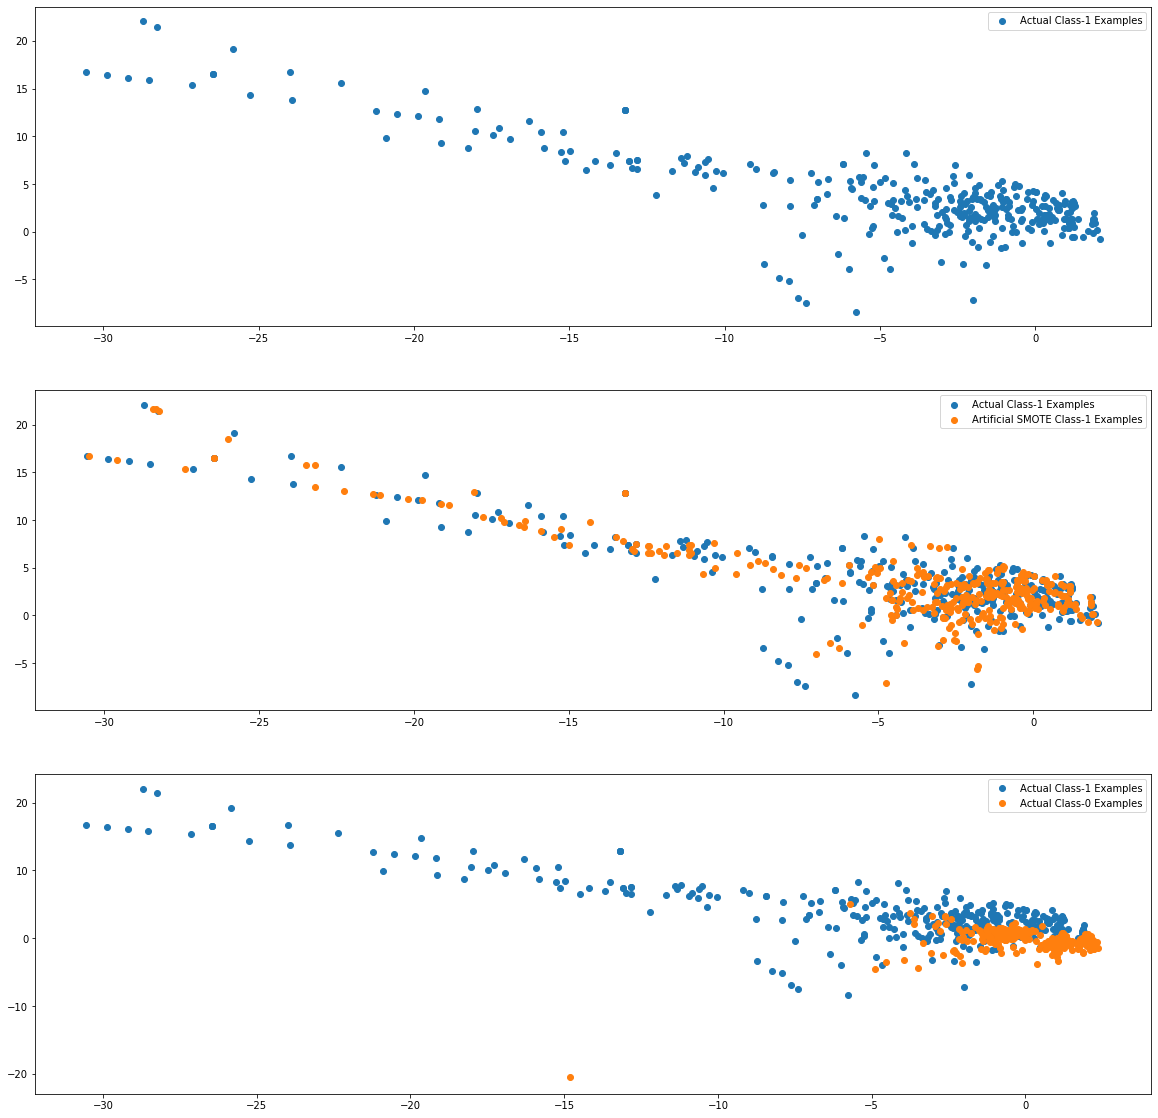

In [527]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:].to_numpy()

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### Print the class distribution after applying ADASYN

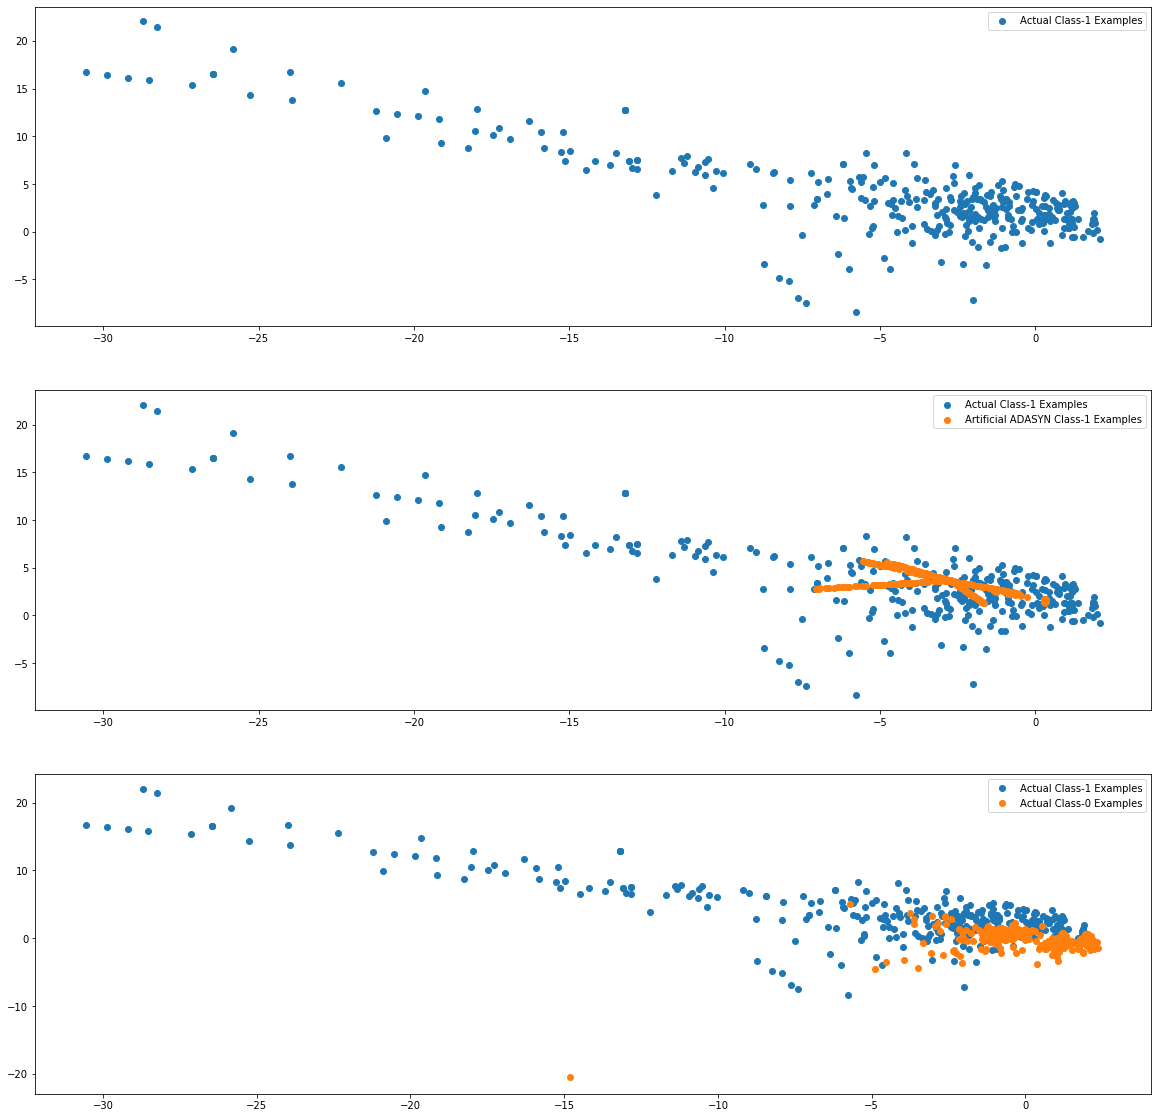

In [528]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:].to_numpy()

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [539]:
# perform the best oversampling method on X_train & y_train
#sampling
from imblearn.over_sampling import SMOTE, ADASYN
X_train_smote, y_train_smote = SMOTE(sampling_strategy=0.02,random_state=42).fit_resample(X_train, y_train)

clf = LogisticRegression(penalty='l2',C= 0.001)  #initialise the model with optimum hyperparameters
clf.fit(X_train_smote,y_train_smote) # fit on the balanced dataset
auc_score=metrics.roc_auc_score( y_test, clf.predict(X_test) )
print(auc_score) #print the evaluation score on the X_test by choosing the best evaluation metric

0.9085434414424977


### Print the important features of the best model to understand the dataset

Top var = 4
2nd Top var = 11
3rd Top var = 21


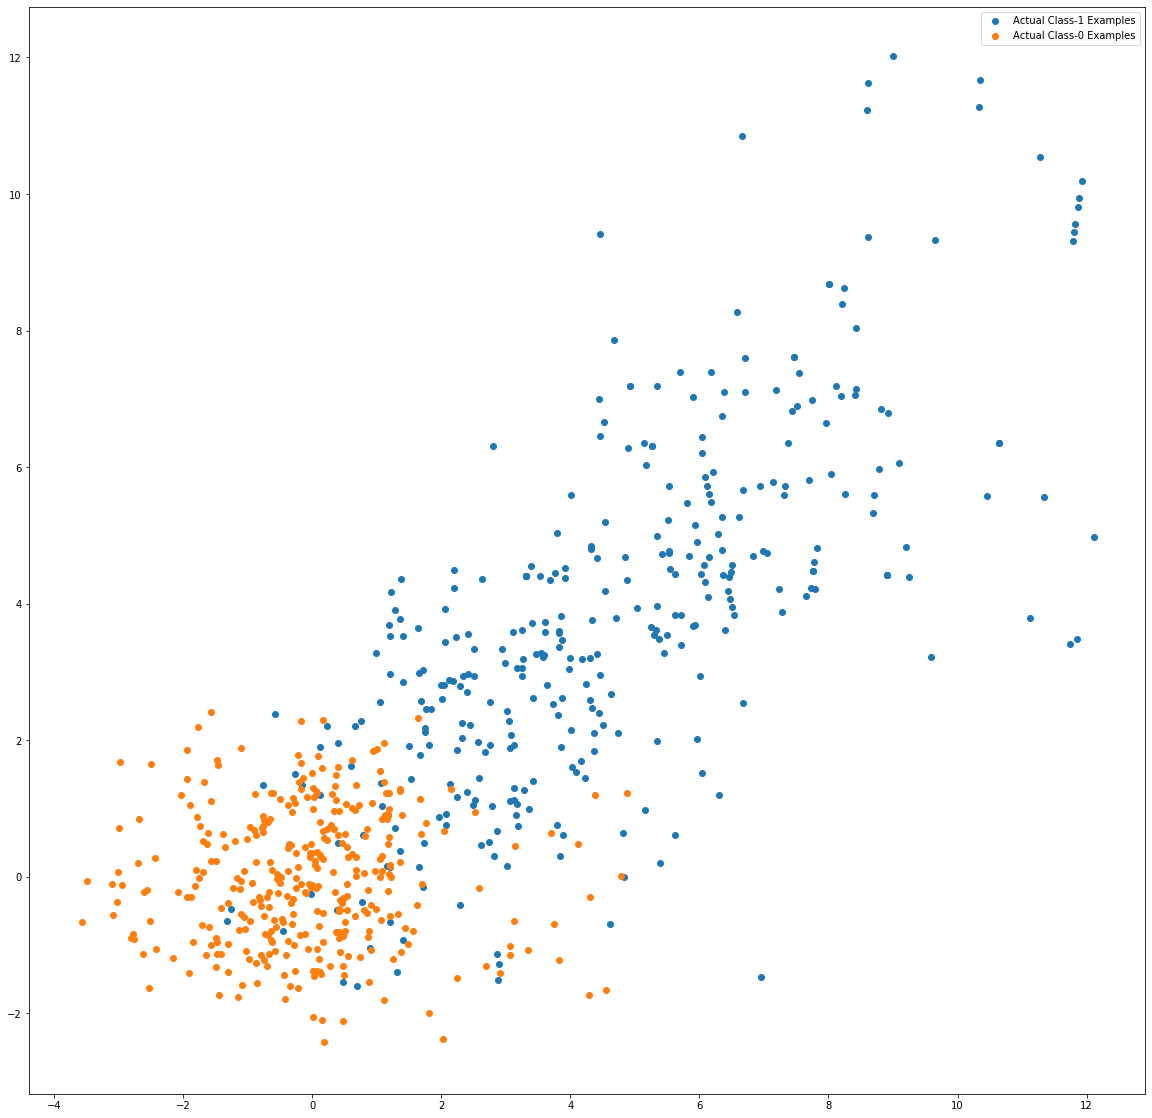

In [531]:
var_imp = []
for i in clf.coef_[0]:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.coef_[0])[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.coef_[0])[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.coef_[0])[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.coef_[0])[-1])
second_top_var_index = var_imp.index(np.sort(clf.coef_[0])[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [541]:
auc_score=metrics.roc_auc_score( y_test, clf.predict(X_test) )
print('Train auc =', auc_score)
fpr, tpr, thresholds = metrics.roc_curve( y_test, clf.predict(X_test))
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 0.9085434414424977
1


In [542]:
from sklearn.metrics import confusion_matrix, classification_report
pred=clf.predict(X_train)
print(confusion_matrix(y_train, pred))
print(classification_report(y_train, pred))

[[198953     67]
 [    63    281]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.81      0.82      0.81       344

    accuracy                           1.00    199364
   macro avg       0.90      0.91      0.91    199364
weighted avg       1.00      1.00      1.00    199364



**Choosing Thershold 0.5 since precision and recall are almost same**

In [543]:
from sklearn.metrics import confusion_matrix, classification_report
pred=clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[85254    41]
 [   27   121]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.75      0.82      0.78       148

    accuracy                           1.00     85443
   macro avg       0.87      0.91      0.89     85443
weighted avg       1.00      1.00      1.00     85443

